In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [59]:
df = pd.read_csv('cirrhosis.csv', encoding='utf8', sep=',')

In [60]:
df.head(7)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0


In [61]:
df.tail(7)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
411,412,1097,C,NaN,24472,F,NaN,NaN,NaN,N,1.0,NaN,3.58,NaN,NaN,NaN,NaN,244.0,10.8,3.0
412,413,989,C,NaN,12784,F,NaN,NaN,NaN,N,0.7,NaN,3.23,NaN,NaN,NaN,NaN,312.0,10.8,3.0
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [62]:
df = df.drop(columns=['ID'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [64]:
df = df.dropna(subset=['Stage'])

In [65]:
df.isna().sum()

N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

<ipython-input-67-155637592ee9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tryglicerides'])


<Axes: xlabel='Tryglicerides', ylabel='Density'>

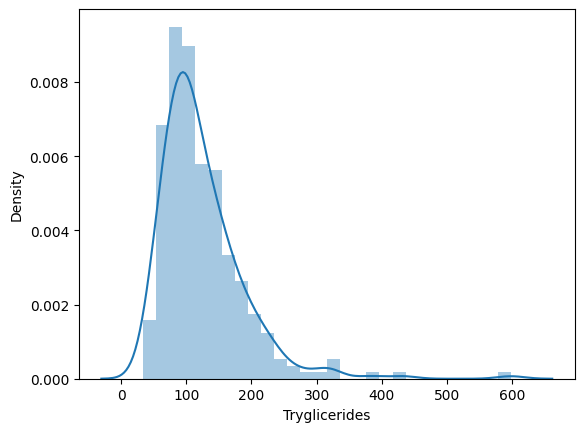

In [67]:
sns.distplot(df['Tryglicerides'])

In [68]:
df['Tryglicerides'] = df['Tryglicerides'].fillna(df['Tryglicerides'].mean())

<ipython-input-69-155637592ee9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tryglicerides'])


<Axes: xlabel='Tryglicerides', ylabel='Density'>

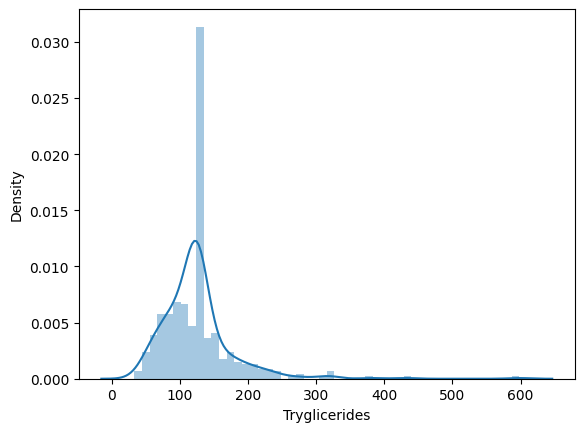

In [69]:
sns.distplot(df['Tryglicerides'])

In [82]:
sub_df = df[df['Drug'].isna()]
sub_df.isna().sum()

N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol      100
Albumin            0
Copper           100
Alk_Phos         100
SGOT             100
Tryglicerides      0
Platelets          7
Prothrombin        2
Stage              0
dtype: int64

In [83]:
sub_df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']] = sub_df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']].fillna('None')
sub_df[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT']] = sub_df[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT']].fillna(0)

<ipython-input-83-43a1375f270d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']] = sub_df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']].fillna('None')
<ipython-input-83-43a1375f270d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT']] = sub_df[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT']].fillna(0)


In [86]:
df.loc[sub_df.index] = sub_df

In [87]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.000000,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.000000,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.000000,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.000000,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,None,24472,F,None,None,None,N,1.2,0.0,2.96,0.0,0.0,0.00,124.702128,174.0,10.9,3.0
414,1103,C,None,14245,F,None,None,None,N,0.9,0.0,3.83,0.0,0.0,0.00,124.702128,180.0,11.2,4.0
415,1055,C,None,20819,F,None,None,None,N,1.6,0.0,3.42,0.0,0.0,0.00,124.702128,143.0,9.9,3.0
416,691,C,None,21185,F,None,None,None,N,0.8,0.0,3.75,0.0,0.0,0.00,124.702128,269.0,10.4,3.0


In [89]:
df.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets        11
Prothrombin       2
Stage             0
dtype: int64

In [99]:
def test_density_fillmean(df, col: str):
    sns.histplot(df[col], kde=True, stat='density')
    sns.histplot(df[col].fillna(df[col].mean()), kde=True, stat='density')

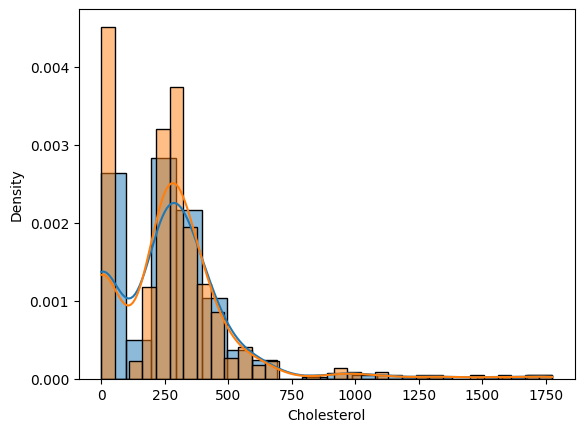

In [100]:
test_density_fillmean(df, 'Cholesterol')

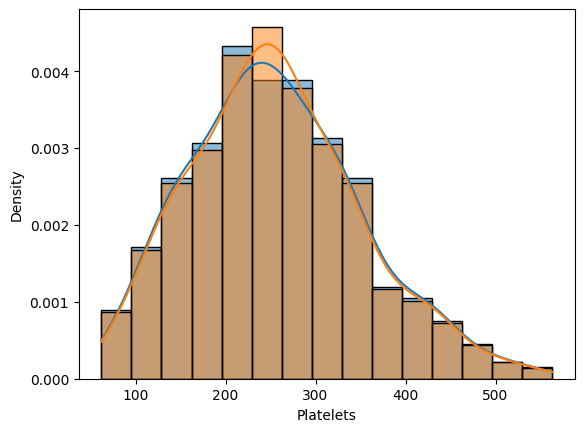

In [101]:
test_density_fillmean(df, 'Platelets')

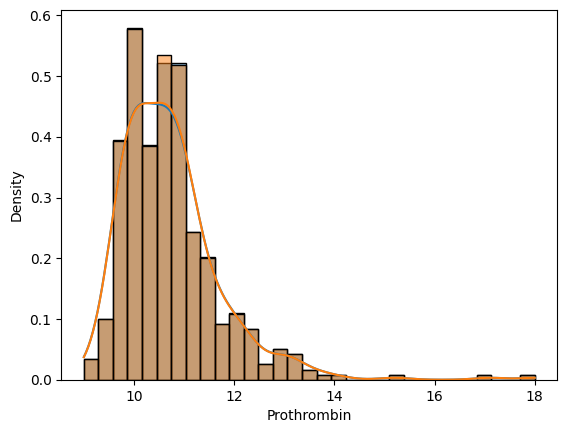

In [102]:
test_density_fillmean(df, 'Prothrombin')

In [107]:
df[['Cholesterol', 'Platelets', 'Prothrombin', 'Copper']] = df[['Cholesterol', 'Platelets', 'Prothrombin', 'Copper']].fillna(df[['Cholesterol', 'Platelets', 'Prothrombin', 'Copper']].mean())
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [109]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1916.837379,18498.286408,3.227670,273.283854,3.500073,73.831707,1501.428641,92.809660,124.702128,256.102244,10.733415,3.024272
std,1099.941147,3823.705746,4.429421,248.220127,0.423948,85.233976,2047.165757,72.111959,53.868836,94.460574,1.024056,0.882042
min,41.000000,9598.000000,0.300000,0.000000,1.960000,0.000000,0.000000,0.000000,33.000000,62.000000,9.000000,1.000000
25%,1094.250000,15609.250000,0.800000,144.750000,3.247500,9.750000,375.000000,43.012500,94.000000,190.000000,10.000000,2.000000
50%,1713.500000,18628.000000,1.400000,273.141927,3.530000,52.000000,1022.000000,91.225000,124.702128,252.500000,10.600000,3.000000
75%,2610.500000,21200.500000,3.400000,350.750000,3.782500,102.000000,1716.500000,136.485000,128.500000,314.500000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           412 non-null    object 
 3   Age            412 non-null    int64  
 4   Sex            412 non-null    object 
 5   Ascites        412 non-null    object 
 6   Hepatomegaly   412 non-null    object 
 7   Spiders        412 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    412 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         412 non-null    float64
 13  Alk_Phos       412 non-null    float64
 14  SGOT           412 non-null    float64
 15  Tryglicerides  412 non-null    float64
 16  Platelets      412 non-null    float64
 17  Prothrombin    412 non-null    float64
 18  Stage     

In [118]:
num_col = []
cat_col = []
for col in df.columns:
    if df.dtypes[col] in ('int64', 'float64'):
        num_col.append(col)
    else:
        cat_col.append(col)
cat_col

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

<Axes: >

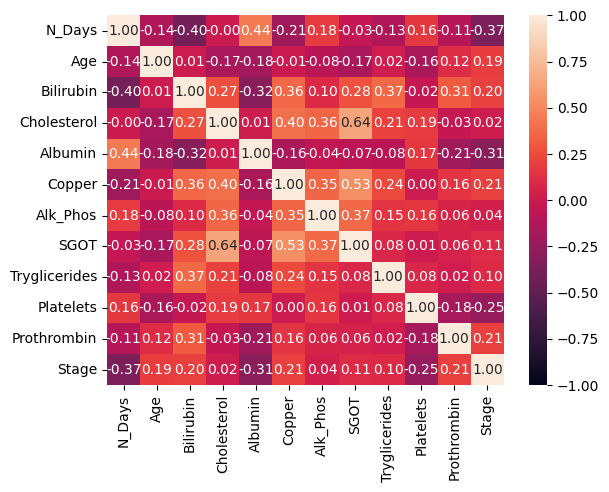

In [136]:
sns.heatmap(data=df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

In [121]:
for col in cat_col:
    temp = df[col].value_counts(dropna=False)
    print(f'{col}\t{temp.count()}')
    display(temp)
    print('=====================================\n')

Status	3


C     230
D     157
CL     25
Name: Status, dtype: int64


Drug	3


D-penicillamine    158
Placebo            154
None               100
Name: Drug, dtype: int64


Sex	2


F    368
M     44
Name: Sex, dtype: int64


Ascites	3


N       288
None    100
Y        24
Name: Ascites, dtype: int64


Hepatomegaly	3


Y       160
N       152
None    100
Name: Hepatomegaly, dtype: int64


Spiders	3


N       222
None    100
Y        90
Name: Spiders, dtype: int64


Edema	3


N    348
S     44
Y     20
Name: Edema, dtype: int64

In [122]:
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
# ])
scaler = StandardScaler()
onehot = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('num', scaler, num_col),
    ('cat', onehot, cat_col)
], remainder='passthrough')

_one two three four **five**_

In [138]:
# one two three four five

X = preprocessor.fit_transform(df)
X.shape

(412, 32)

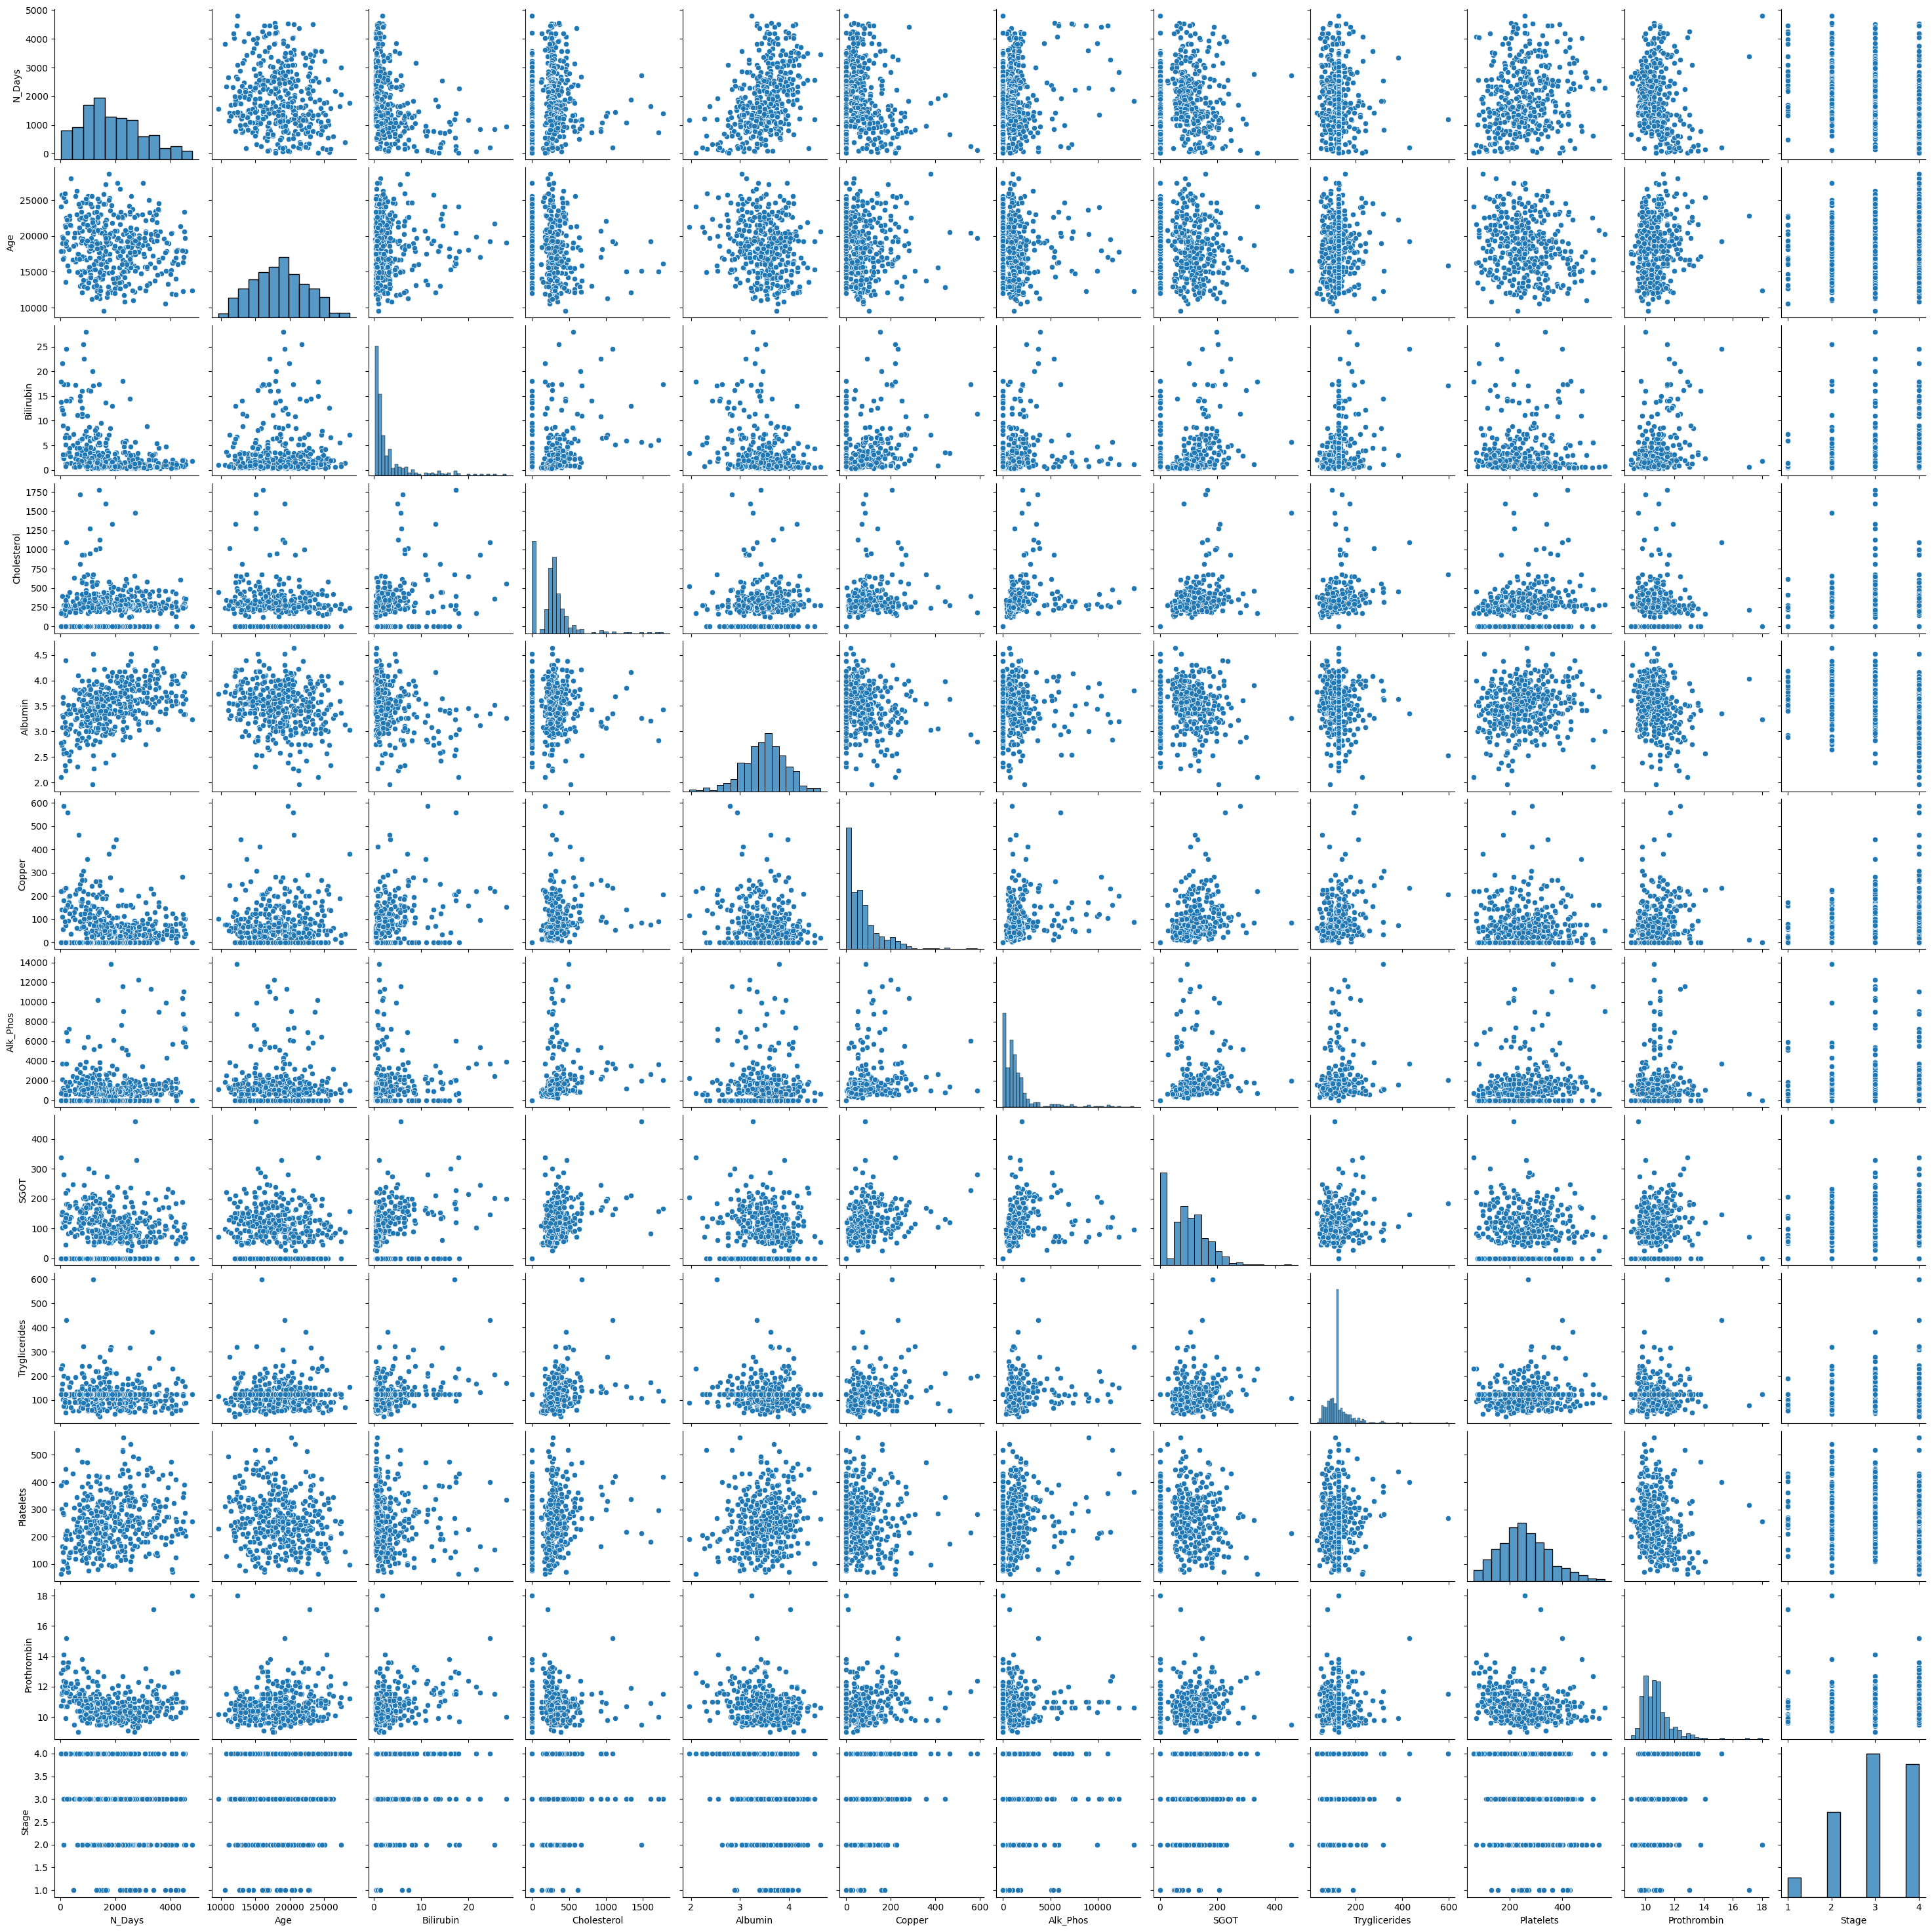

In [108]:
sns.pairplot(data=df)